In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../modules")
import PBD_analog
import graph_tools
import matplotlib as mpl
plt.style.use("customstyle")
norm = mpl.colors.Normalize(vmin=0, vmax=1)

In [29]:
# Default params Hua et al
default = dict(e = 2e-7, b = 0.27, l2 = 0.31)

In [30]:
b = np.geomspace(0.01,1.0,200)
l2 = np.geomspace(0.005,1.0,200)
par = dict(e = default['e'])


varJacbl2 = np.zeros((2, 3, len(l2), len(b)))

for i_bd in (0,1):
    for i_simp_pbd in range(3):
        Z = np.zeros((len(l2), len(b)))
        F = np.zeros_like(Z)
        for i1 in range(len(b)):
            for i2 in range(len(l2)):
                Z[i2, i1] = PBD_analog.simp_jacobian_analog_bd(i_bd, i_simp_pbd, b = b[i1], l2 = l2[i2], **par)
                varJacbl2[i_bd, i_simp_pbd, i2, i1] = Z[i2, i1]


e = np.geomspace(5e-8,1.0,200)
par = dict(b = default['b'])
varJacel2 = np.zeros((2, 3, len(l2), len(e)))

for i_bd in (0,1):
    for i_simp_pbd in range(3):
        Z = np.zeros((len(l2), len(e)))
        F = np.zeros_like(Z)
        for i1 in range(len(e)):
            for i2 in range(len(l2)):
                Z[i2, i1] = PBD_analog.simp_jacobian_analog_bd(i_bd, i_simp_pbd, e = e[i1], l2 = l2[i2], **par)
                varJacel2[i_bd, i_simp_pbd, i2, i1] = Z[i2, i1]


# relative values of the partial derivatives 
sumJac = np.sum(np.abs(varJacbl2), axis = 1)
relatJacbl2 = np.zeros_like(varJacbl2)
for i_simp_pbd in range(3):
    relatJacbl2[:, i_simp_pbd, :, :] = varJacbl2[:, i_simp_pbd, :, :] / sumJac
relatJacbl2 = 100 * relatJacbl2
sumJac = np.sum(np.abs(varJacel2), axis = 1)
relatJacel2 = np.zeros_like(varJacel2)
for i_simp_pbd in range(3):
    relatJacel2[:, i_simp_pbd, :, :] = varJacel2[:, i_simp_pbd, :, :] / sumJac
relatJacel2 = 100 * relatJacel2

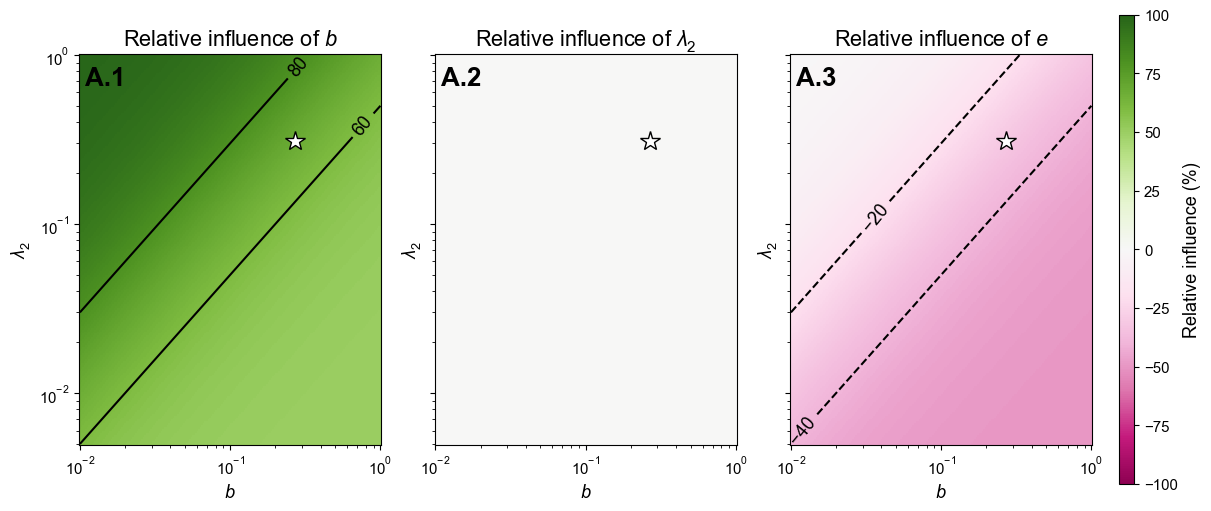

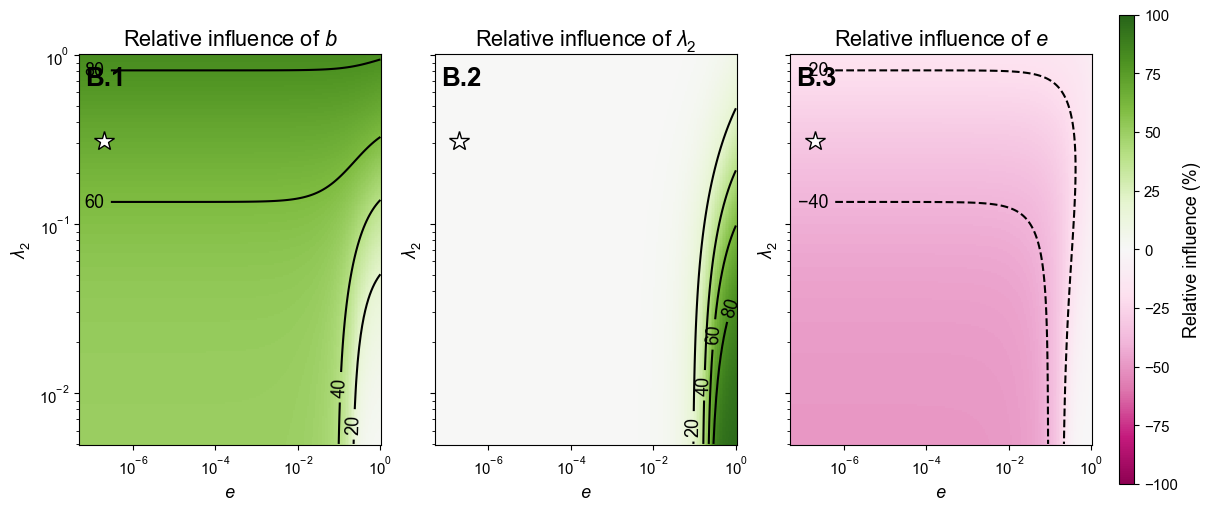

In [31]:
fig, axes = plt.subplots(1, 3,figsize = (12,5), sharex=True, sharey=True, layout = "constrained")

simp_pbd_full_names = ["b", "\\lambda_2", "e"]

colormap = dict(cmap = "PiYG", vmin = -100, vmax = 100)
levels = np.linspace(-100, 100, 11)

for i in range(3):
    ax = axes[i]
    ax.set_xscale("log")
    ax.set_yscale("log")
    im = ax.pcolormesh(b, l2, relatJacbl2[0, i, :, :], **colormap, rasterized = True)
    cont = ax.contour(b, l2, relatJacbl2[0, i, :, :], colors = "k", levels = levels)
    ax.clabel(cont, cont.levels)
    

    ax.set_title("Relative influence of ${}$".format(simp_pbd_full_names[i]))
    ax.set_xlabel("$b$")
    ax.set_ylabel("$\\lambda_2$")
    

graph_tools.name_plot_corner(axes[0], 'A.1')
graph_tools.name_plot_corner(axes[1], 'A.2')
graph_tools.name_plot_corner(axes[2], 'A.3')

# Add Hua et al. values
annotstyle = dict(ls = "", marker = "*", markerfacecolor = "w", markeredgecolor = "k", markersize = 15)
for i in range(3):
    axes[i].plot([default['b']], [default['l2']], **annotstyle)

fig.colorbar(im, label = "Relative influence (%)", shrink = 1.2, aspect = 30)
#fig.suptitle("Relative influence of the PBD parameters on the BD equivalent constant birth rate")

#plt.savefig("../fig/SM_relative_influence_bl2.pdf")

fig, axes = plt.subplots(1, 3,figsize = (12,5), sharex=True, sharey=True, layout = "constrained")
colormap = dict(cmap = "PiYG", vmin = -100, vmax = 100)
levels = np.linspace(-100, 100, 11)

for i in range(3):
    ax = axes[i]
    ax.set_xscale("log")
    ax.set_yscale("log")
    im = ax.pcolormesh(e, l2, relatJacel2[0, i, :, :], **colormap, rasterized = True)
    cont = ax.contour(e, l2, relatJacel2[0, i, :, :], colors = "k", levels = levels)
    ax.clabel(cont, cont.levels)
    
    
    ax.set_title("Relative influence of ${}$".format(simp_pbd_full_names[i]))
    ax.set_xlabel("$e$")
    ax.set_ylabel("$\\lambda_2$")
    

graph_tools.name_plot_corner(axes[0], 'B.1')
graph_tools.name_plot_corner(axes[1], 'B.2')
graph_tools.name_plot_corner(axes[2], 'B.3')
for i in range(3):
    axes[i].plot([default['e']], [default['l2']], **annotstyle)

fig.colorbar(im, label = "Relative influence (%)", shrink = 1.2, aspect = 30)
#fig.suptitle("Relative influence of the PBD parameters on the BD equivalent constant birth rate")

#plt.savefig("../fig/SM_relative_influence_el2.pdf")

In [32]:
# Hua et al. values 
jacHua = np.zeros((2, 3))
for i_bd in (0,1):
    for i_simp_pbd in (0,1,2):
        jacHua[i_bd, i_simp_pbd] = PBD_analog.simp_jacobian_analog_bd(i_bd, i_simp_pbd, **default)


sumJac = np.sum(np.abs(jacHua), axis = 1)
relatJacHua = np.zeros_like(jacHua)
for i_simp_pbd in range(3):
    relatJacHua[:, i_simp_pbd] = jacHua[:, i_simp_pbd] / sumJac
relatJacHua = 100 * relatJacHua
print("Parameters b = {}, l2 = {}, e = {}\n".format(default['b'], default['l2'], default['e']))
print("Influence of b  on birth rate :  {:.2f} %".format(relatJac[0,0]))
print("Influence of l2 on birth rate :   {:.2f} %   ({} %)".format(relatJac[0,1], relatJac[0,1]))
print("Influence of e  on birth rate : {:.2f} %".format(relatJac[0,2]))

Parameters b = 0.27, l2 = 0.31, e = 2e-07

Influence of b  on birth rate :  68.24 %
Influence of l2 on birth rate :   0.00 %   (1.0953346036254138e-05 %)
Influence of e  on birth rate : -31.76 %


0.1823529811239702 0.00021790407895718692


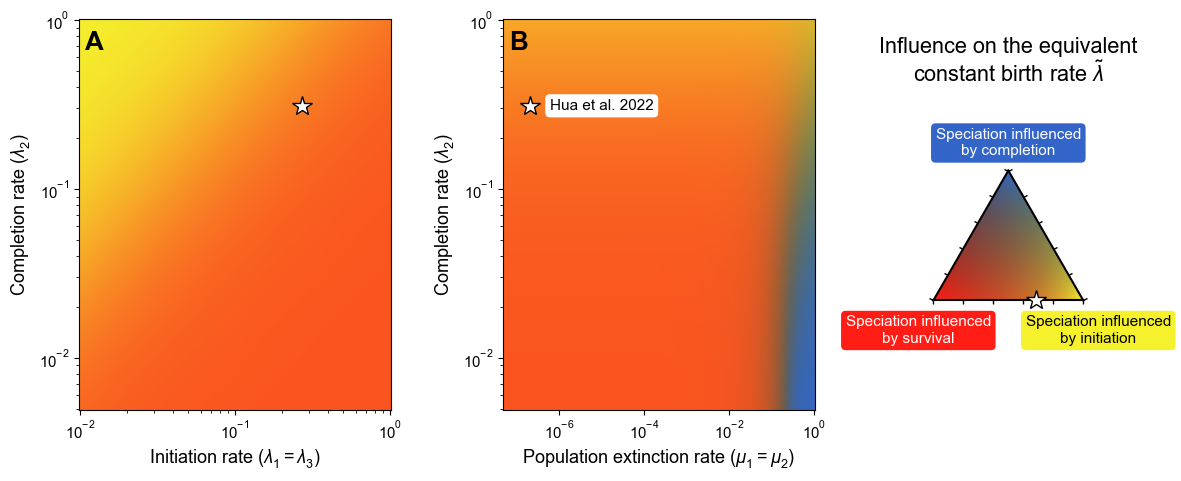

In [33]:
# Mix color matrix
col_l2 = np.array([51,100,200], dtype = float) / 255
col_b = np.array([245,242,45], dtype = float) / 255
col_e = np.array([255,29,21], dtype = float) / 255

geom = True


# b vs l2
sumJacbl2 = np.sum(np.abs(varJacbl2[0, :, :, :]), axis = 0)
colMatbl2 = np.zeros((len(l2), len(b), 3))
for i_hue in range(3):
    colMatbl2[:, :, i_hue] = graph_tools.mix_color(col_b[i_hue], col_l2[i_hue], col_e[i_hue],
                                        np.abs(varJacbl2[0, 0, :, :]) / sumJacbl2,
                                        np.abs(varJacbl2[0, 1, :, :]) / sumJacbl2,
                                        np.abs(varJacbl2[0, 2, :, :]) / sumJacbl2,
                                        geom=geom)


# m2 vs l2
sumJacel2 = np.sum(np.abs(varJacel2[0, :, :, :]), axis = 0)
colMatel2 = np.zeros((len(l2), len(e), 3))
for i_hue in range(3):
    colMatel2[:, :, i_hue] = graph_tools.mix_color(col_b[i_hue], col_l2[i_hue], col_e[i_hue],
                                        np.abs(varJacel2[0, 0, :, :]) / sumJacel2,
                                        np.abs(varJacel2[0, 1, :, :]) / sumJacel2,
                                        np.abs(varJacel2[0, 2, :, :]) / sumJacel2,
                                        geom=geom)

fig, axes = plt.subplots(1,3, figsize = (12, 5), width_ratios=(2.5,2.5,1.3))
ax = axes[0]
ax.set_xscale("log")
ax.set_yscale("log")
ax.pcolormesh(b, l2, colMatbl2, rasterized = True)

ax.set_xlabel("Initiation rate ($\\lambda_1 = \\lambda_3$)")
ax.set_ylabel("Completion rate ($\\lambda_2$)")

ax = axes[1]
ax.set_xscale("log")
ax.set_yscale("log")
ax.pcolormesh(e, l2, colMatel2, rasterized = True)

ax.set_xlabel("Population extinction rate ($\\mu_1 = \\mu_2$)")
ax.set_ylabel("Completion rate ($\\lambda_2$)")


# Add annotations
boxst = dict(boxstyle = "round", ec = "none")
axes[0].plot(default['b'], default['l2'], **annotstyle)
axes[1].plot(default['e'], default['l2'], **annotstyle)
axes[1].text(default['e']*3, default['l2'], "Hua et al. 2022", ha = "left", va = "center", color = "k", bbox = dict(fc = "white", **boxst), size = 11)
graph_tools.name_plot_corner(axes[0], 'A')
graph_tools.name_plot_corner(axes[1], 'B')

# Triangle caption
ax = axes[2]


x, y  = -1.15, -0.55

#ax.add_patch(plt.Rectangle((x,y), -2*x, 1.8,clip_on = False, ec = "dimgray", fc = "dimgray"))

graph_tools.color_scale_triangle(ax, col_b, col_l2, col_e, geom)

# Triangulation of the value by Hua 
re = -relatJacHua[0,2]/100
rb = relatJacHua[0,0]/100
x = (2-re-rb)*(rb-re)/2
y = np.sqrt((1-re)**2-(x+0.5)**2)
print(x,y)
ax.plot([x],[y], **annotstyle)


textst = dict(size =11, ha = "center", va = "center")
ax.text(x = 0.6, y = -0.2, s = "Speciation influenced\nby initiation", 
        color = "k", bbox = dict(fc = col_b, **boxst), **textst)
ax.text(x = 0, y = 1.05, s = "Speciation influenced\nby completion", 
        color = "w", bbox = dict(fc = col_l2, **boxst), **textst)
ax.text(x = -0.6, y = -0.2, s = "Speciation influenced\nby survival", 
        color = "w", bbox = dict(fc = col_e, **boxst), **textst)

ax.set_aspect("equal", adjustable="box")
ax.tick_params(axis='y', which='major', pad=-15)

ax.set_xlim(-0.54,0.54)
ax.set_ylim(-0.25, 1.4)
ax.set_ylabel(None)
ax.set_title("Influence on the equivalent\nconstant birth rate $\\tilde\\lambda$")
plt.savefig("../fig/Hua_simp_influence_parameters.pdf")